<h1>AQUI CAMBIO DE CARPETA A DONDE TENGO MIS DATOS</h1>


In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\430008671\Downloads')

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 4A37-0AEA

 Directorio de C:\Users\430008671\Downloads

18/06/2024  12:37 p. m.    <DIR>          .
18/06/2024  12:37 p. m.    <DIR>          ..
14/07/2023  02:00 p. m.             2,138 04_despues_2022.txt
24/04/2024  04:09 p. m.         2,612,722 8D9D5A10
01/02/2024  11:48 a. m.             1,198 Agente-ejecutivo.sql
27/12/2023  11:18 a. m.           474,823 Autos + daños.xlsx
16/04/2024  03:38 p. m.         2,349,275 BaseAgentes.xlsx
24/04/2024  04:02 p. m.         2,611,937 BaseAgentesII.xlsx
11/04/2024  10:20 a. m.             5,688 batman.jfif
16/04/2024  03:36 p. m.         2,349,280 BBF4BA10
24/04/2024  01:02 p. m.                 0 chinook.sqlite
24/04/2024  12:57 p. m.           884,736 chinook.sqlite.db
24/04/2024  04:01 p. m.         5,203,118 DAB55A10
05/01/2024  11:07 a. m.           222,941 FORMATO DE REQUERIMIENTO DE SOFTWARE 1 (1).pdf
21/05/2024  05:25 p. m.           253,788 MicrosoftTea

<h1> Aquí importo los paquetes

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
import pandas as pd, seaborn as sns, numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.vq import whiten

<h2>Algunas pruebas

In [4]:
file = open('04_despues_2022.txt', 'r')

print(file.read())
print(file.closed)

select
  sin.IdOficina
  
  --, sin.NipPerfilAgente   Esta se descomenta si necesito el agente
  --sin.NumReclamo
  , Ocurrido = sum(sin.Ocurrido)
  , GastosDirectos =  sum(sin.GastosDirectos)
  , GastosIndirectos = sum(sin.GastosIndirectos)
  , Salvamentos = sum(sin.Salvamentos)
  , Rec3Ros = sum(sin.RecuperacionesTercerosResponsables + isnull(sc.Monto, 0))
  , SinTotal = 
      (
        sum(sin.Ocurrido)
        + sum(sin.GastosDirectos)
        + sum(sin.GastosIndirectos)
        - sum(sin.Salvamentos)
        - sum(sin.RecuperacionesTercerosResponsables + isnull(sc.Monto, 0))
      )
from
  (
    select
      IdOficina = sin.IdOficinaEmision
      , NumReclamo
      , Ocurrido = sum(sin.Ocurrido)
      , GastosDirectos = sum(sin.GastosAjuste)
      , GastosIndirectos = sum(sin.GastosIndirectos)
      , Salvamentos = sum(sin.EstimadoSalvamentos + sin.AjustesSalvamentos)
      , RecuperacionesTercerosResponsables = sum(RecuperacionesTercerosResponsables)
    from
      DMSin.Tb_BI_A

<h1> Exporto el documento y lo hago df

In [6]:
base = 'BaseAgentesII.xlsx'
xls = pd.ExcelFile(base)
print(xls.sheet_names)

['Hoja1']


In [9]:
df_agentes = xls.parse('Hoja1',skiprows=[1])

df_agentes.columns = df_agentes.iloc[0]

df_agentes = df_agentes[1:]

#df_agentes = df_agentes[df_agentes['PTO AGT NUEVO']==0]

# Print the head of the DataFrame df1
print(df_agentes.head())

0                   Canal     DIRECCIÓN        SUBDIRECCIÓN  \
1  PROMOTORÍAS MULTIMARCA  MEXICO - SUR  MEXICO PROMOTORIAS   
2                 AGENTES  MEXICO - SUR    MEXICO DESPACHOS   
3                 AGENTES  MEXICO - SUR    MEXICO DESPACHOS   
4  PROMOTORÍAS MULTIMARCA  MEXICO - SUR  MEXICO PROMOTORIAS   
5               DESPACHOS  MEXICO - SUR                 SUR   

0          OFICINA COMERCIAL                   OFICINA OPERATIVA  \
1  Promotorías México Centro  697 MILIAN Y GONZALEZ LEGORRETA SC   
2            México Satélite                  89 MEXICO SATELITE   
3           México Plaza Inn                       7 MEXICO D.F.   
4   Promotorías México Norte                 924 AARCO HAPPY CAR   
5                     Puebla                           22 PUEBLA   

0                                           CONVENIO  \
1                        MILIAN Y GONZALEZ LEGORRETA   
2                                                      
3                                           

In [10]:
df_agentes

,Canal,DIRECCIÓN,SUBDIRECCIÓN,OFICINA COMERCIAL,OFICINA OPERATIVA,CONVENIO,NOMBRE,FECHA INGRESO,PTO AGT NUEVO,AUTOS,...,PUNTOS CREC,DEVENGADA,SINIESTROS,% SIN,PUNTOS IC,TOTAL PUNTOS,Segmento,IC Agente promedio 3 años,IC Convenio,Combinacion
1,PROMOTORÍAS MULTIMARCA,MEXICO - SUR,MEXICO PROMOTORIAS,Promotorías México Centro,697 MILIAN Y GONZALEZ LEGORRETA SC,MILIAN Y GONZALEZ LEGORRETA,123DIGITAL AGENTE DE SEGUROS SAPI DE CV,45167,1,0,...,0,0,0,0,2,3,C,0,NaN,R0-PA1-N0-C0-IC2
2,AGENTES,MEXICO - SUR,MEXICO DESPACHOS,México Satélite,89 MEXICO SATELITE,,3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A ...,45111,1,0,...,0,0,0,0,2,3,C,0,NaN,R0-PA1-N0-C0-IC2
3,AGENTES,MEXICO - SUR,MEXICO DESPACHOS,México Plaza Inn,7 MEXICO D.F.,,A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.,44130,0,0,...,0,0,0,0,2,2,C,0,NaN,R0-PA0-N0-C0-IC2
4,PROMOTORÍAS MULTIMARCA,MEXICO - SUR,MEXICO PROMOTORIAS,Promotorías México Norte,924 AARCO HAPPY CAR,,AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV,43545,0,37613026.8811,...,2,67802232.452493,69145307.319306,1.019809,-1,9,B,1.01167,NaN,R3-PA3-N2-C2-IC-1
5,DESPACHOS,MEXICO - SUR,SUR,Puebla,22 PUEBLA,ALTERNATIVAS EN RIESGO AGENTE DE SEGUROS Y DE ...,AARON ALEJANDRO QUIROZ PARRILLA,45069,1,32838.6343,...,0,17597.2641,0,0,2,6,C,0.175495,NaN,R1-PA1-N2-C0-IC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,PROMOTORÍAS MULTIMARCA,BAJIO - OCCIDENTE,OCCIDENTE,Puerto Vallarta,222 CROZ PROMOTORES VALLARTA,CROZ PROMOTORES,"ZO AGENTE DE SEGUROS, S.A. DE C.V.",40702,0,113358.2323,...,0,4275060.282663,1876856.1769,0.439024,2,6,C,0.683503,NaN,R2-PA1-N1-C0-IC2
9569,AGENTES,BAJIO - OCCIDENTE,OCCIDENTE,Guadalajara Agentes,5 GUADALAJARA,,ZOILA ANGELICA FAISAL RAMAL,43762,0,54053.0734,...,1,55000.4092,43165.4309,0.78482,2,4,C,0.484053,NaN,R1-PA0-N0-C1-IC2
9570,PROMOTORÍAS MULTIMARCA,NORTE,NOROESTE,Tijuana Promotorias,435 BTG TIJUANA,BTG CONSULTORES DE RIESGO SC,ZULIANA CAROLINA GUTIERREZ IBARRA,43900,0,0,...,0,0,0,0,2,2,C,0,NaN,R0-PA0-N0-C0-IC2
9571,AGENTES,BAJIO - OCCIDENTE,OCCIDENTE,Guadalajara Agentes,5 GUADALAJARA,,ZULMA YANIRA CRUZ MACHUCA,39975,0,0,...,0,0,0,0,2,2,C,0,NaN,R0-PA0-N0-C0-IC2


In [11]:
print(type(df_agentes['AUTOS']))

<class 'pandas.core.series.Series'>


In [12]:
df_agentes['AUTOS'].dtype

dtype('O')

In [13]:
print(df_agentes['AUTOS'].sum())
print(df_agentes['AUTOS'].mean())

4184367092.837101
437146.5830377247


In [14]:
df_agentes['AUTOS'].astype(float)

1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       3.761303e+07
5       3.283863e+04
            ...     
9568    1.133582e+05
9569    5.405307e+04
9570    0.000000e+00
9571    0.000000e+00
9572    3.013384e+05
Name: AUTOS, Length: 9572, dtype: float64

<h2>Normalizo algunas variables

In [ ]:
df_agentes['scaled_autos']=whiten(df_agentes['AUTOS'].astype(float),check_finite=True)
df_agentes['scaled_daños']=whiten(df_agentes['DAÑOS'].astype(float),check_finite=True)
df_agentes['scaled_crec_pol']=whiten(df_agentes['% CREC POL'].astype(float),check_finite=True)
df_agentes['scaled_GMM']=whiten(df_agentes['GMM'].astype(float),check_finite=True)
df_agentes['scaled_vig']=whiten(df_agentes['% PART NUEVAS'].astype(float),check_finite=True)
df_agentes['scaled_crec_prim']=whiten(df_agentes['% CREC PRIMA'].astype(float),check_finite=True)
df_agentes['scaled_ptos_ramo']=whiten(df_agentes['PUNTOS PRIMA'].astype(float),check_finite=True)
df_agentes['scaled_prima']=whiten(df_agentes['PRIMA ANUAL'].astype(float),check_finite=True)
df_agentes['scaled_IC']=whiten(df_agentes['IC Agente promedio 3 años'].astype(float),check_finite=True)
#df_agentes['Prima_rentable']=df_agentes['Prima_rentable'].astype(float)
#df_agentes['scaled_PR']=whiten(df_agentes['Prima_rentable'].astype(float),check_finite=True)

# Empiezan las clusterizaciones

## Con autos y daños escalados

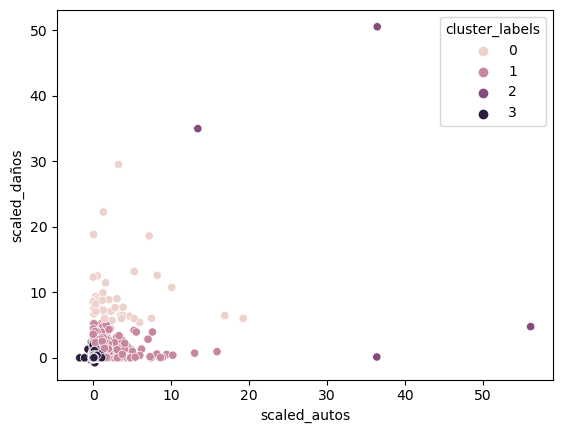

In [19]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_autos', 'scaled_daños']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_autos', 'scaled_daños']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='scaled_autos', y='scaled_daños', 
                hue='cluster_labels', data = df_agentes)
plt.show()

In [20]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0      39
1     231
2       4
3    9298
Name: NOMBRE, dtype: int64


## Con autos, daños, crec, gmm, vig, ramos

In [21]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']], cluster_centers)

In [22]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0    1438
1    2217
2    2455
3    3462
Name: NOMBRE, dtype: int64


In [23]:
print(df_agentes.groupby('cluster_labels')[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']].mean())

0               scaled_autos  scaled_daños  scaled_crec_pol  scaled_GMM  \
cluster_labels                                                            
0                   0.042050      0.054057         0.290943    0.041400   
1                   0.055397      0.017321         0.003490    0.036011   
2                  -0.002604      0.000016        -0.053698   -0.004071   
3                   0.380643      0.394237         0.113286    0.463091   

0               scaled_vig  scaled_crec_prim  scaled_ptos_ramo  
cluster_labels                                                  
0                 2.807892     -3.647123e-03          1.259826  
1                 0.734407     -3.803054e-02          1.094457  
2                 0.010545     -9.031783e-16          0.000000  
3                 1.158479      1.284637e-02          2.385108  


In [24]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

2 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALFREDO RAMOS MARTINEZ' 'AARON ESPINOSA TEUTLI']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV' 'AARON GARZA RODRIGUEZ'
 'ABEL BERNAL ORPINEL' 'ABEL SALGADO MEJIA' 'ABEL TRUJILLO GARCIA']
0 ['AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ENRIQUE CARRIZALES LEMUS'
 'ABEL ORNELAS ALCALA' 'ABEL RAMIREZ MIRANDA'
 'ABELARDO RODRIGUEZ SERRALDE']
1 ['AARON BARRON VIZUET' 'ABIGAIL AMADOR CRUZ' 'ABRAHAM ATRI MARCOVICH'
 'ABRAHAM PATIÑO CASTILLO' 'ABRAHAM SANCHEZ CAN']


## Con prima (total) y los mismos anteriores

In [25]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_prima','scaled_crec_pol','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_prima','scaled_crec_pol','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']], cluster_centers)

In [26]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0    1326
1    2455
2    2230
3    3561
Name: NOMBRE, dtype: int64


In [27]:
print(df_agentes.groupby('cluster_labels')[['scaled_prima','scaled_crec_pol','scaled_vig','scaled_crec_prim','scaled_ptos_ramo']].mean())

0               scaled_prima  scaled_crec_pol  scaled_vig  scaled_crec_prim  \
cluster_labels                                                                
0                   0.044478         0.151181    2.865705     -3.955175e-03   
1                  -0.002058        -0.053698    0.010545     -9.031783e-16   
2                   0.049185        -0.005529    0.735760      2.203336e-02   
3                   0.434533         0.176966    1.189529     -2.498566e-02   

0               scaled_ptos_ramo  
cluster_labels                    
0                       1.180783  
1                       0.000000  
2                       1.092124  
3                       2.385322  


In [28]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

1 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALFREDO RAMOS MARTINEZ' 'AARON ESPINOSA TEUTLI']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV' 'AARON GARZA RODRIGUEZ'
 'ABEL BERNAL ORPINEL' 'ABEL SALGADO MEJIA' 'ABEL TRUJILLO GARCIA']
0 ['AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ENRIQUE CARRIZALES LEMUS'
 'ABEL ORNELAS ALCALA' 'ABEL RAMIREZ MIRANDA'
 'ABELARDO RODRIGUEZ SERRALDE']
2 ['AARON BARRON VIZUET' 'ABIGAIL AMADOR CRUZ' 'ABRAHAM ATRI MARCOVICH'
 'ABRAHAM PATIÑO CASTILLO' 'ABRAHAM SANCHEZ CAN']


## Las primas divididas pero sin ramos

In [29]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim']], cluster_centers)

In [30]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0    4080
1    3818
2    1531
3     143
Name: NOMBRE, dtype: int64


In [31]:
print(df_agentes.groupby('cluster_labels')[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim']].mean())

0               scaled_autos  scaled_daños  scaled_crec_pol  scaled_GMM  \
cluster_labels                                                            
0                   0.021523      0.013855        -0.035305    0.038129   
1                   0.243870      0.231206         0.085995    0.150675   
2                   0.043177      0.058739         0.309083    0.108400   
3                   2.864786      3.159591         0.202737    5.844710   

0               scaled_vig  scaled_crec_prim  
cluster_labels                                
0                 0.113091     -9.620861e-17  
1                 1.259153     -1.220595e-03  
2                 2.785094     -5.849659e-02  
3                 1.186240      3.435971e-01  


In [32]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

0 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALFREDO RAMOS MARTINEZ' 'AARON BARRON VIZUET']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'ADELANTE, AGENTE DE SEGUROS Y DE FIANZAS, S.A. DE C.V.'
 'AFIRMA AGENTE DE SEGUROS SA DE CV' 'ALBERTO RAFAEL AILLAUD MADRIGAL'
 'ALEJANDRO JAVIER SOSA GUTIERREZ']
2 ['AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ENRIQUE CARRIZALES LEMUS'
 'ABEL RAMIREZ MIRANDA' 'ABELARDO RODRIGUEZ SERRALDE'
 'ABIGAIL PEREZ MIRANDA']
1 ['AARON GARZA RODRIGUEZ' 'ABEL BERNAL ORPINEL' 'ABEL ORNELAS ALCALA'
 'ABEL SALGADO MEJIA' 'ABELARDO LOZANO ALCANTAR']


# Con prima total y IC escalado

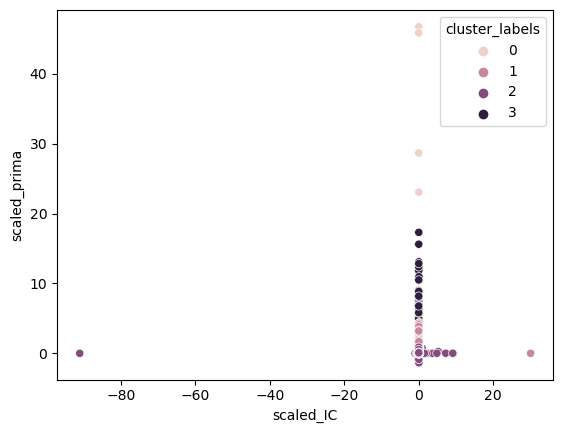

In [33]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_IC','scaled_prima']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_IC','scaled_prima']], cluster_centers)

df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_IC','scaled_prima']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='scaled_IC', y='scaled_prima', 
                hue='cluster_labels', data = df_agentes)
plt.show()

In [34]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0       4
1     295
2    9238
3      35
Name: NOMBRE, dtype: int64


In [35]:
print(df_agentes.groupby('cluster_labels')[['scaled_IC','scaled_prima']].mean())

0               scaled_IC  scaled_prima
cluster_labels                         
0                0.028064     36.102205
1                0.131540      1.971045
2                0.019188      0.076476
3                0.030453      7.960686


In [36]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

2 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ALFREDO RAMOS MARTINEZ']
0 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'FELIPE BALLESTEROS MONTIEL'
 'GRUPO CIDAR BUSINESS BROKERS AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'SICUREZZA AGENTE DE SEGUROS Y DE FIANZAS SA DE CV']
1 ['AD SEGUROS, AGENTE DE SEGUROS Y DE FIANZAS, S.A DE C.V.'
 'ADAN PORRAS RANGEL' 'ADAN RAFAEL RAMIREZ CARREÑO'
 'ADRIAN FRANCISCO GOMEZ YANOWISKY' 'ALAN ACOSTA QUINTANILLA']
3 ['ALBERTO RAFAEL AILLAUD MADRIGAL' 'ALEJANDRO JAVIER SOSA GUTIERREZ'
 'ALIANZA TECNOLOGICA AGENTE DE SEGUROS Y DE FIANZAS'
 'ARTURO DANIEL VALLES ORTA'
 'ASESORIA EN PROTECCION AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V']


# Lo mismo que anterior pero sin escalar

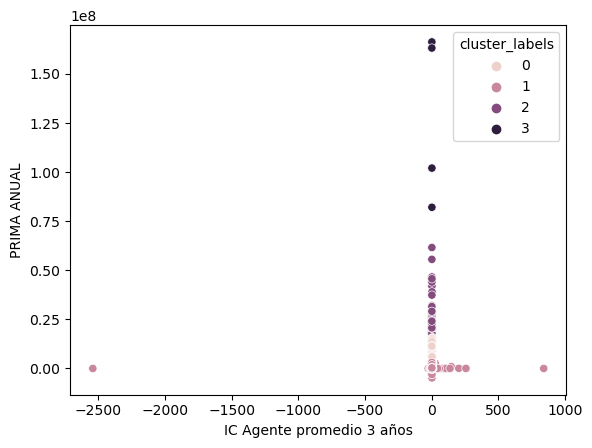

In [37]:
df_agentes['IC Agente promedio 3 años']=df_agentes['IC Agente promedio 3 años'].astype(float)
df_agentes['PRIMA ANUAL']=df_agentes['PRIMA ANUAL'].astype(float)

cluster_centers, distortion = kmeans(df_agentes[['IC Agente promedio 3 años','PRIMA ANUAL']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['IC Agente promedio 3 años','PRIMA ANUAL']], cluster_centers)

df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['IC Agente promedio 3 años','PRIMA ANUAL']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='IC Agente promedio 3 años', y='PRIMA ANUAL', 
                hue='cluster_labels', data = df_agentes)
plt.show()

In [38]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0     294
1    9239
2      35
3       4
Name: NOMBRE, dtype: int64


In [39]:
print(df_agentes.groupby('cluster_labels')[['IC Agente promedio 3 años','PRIMA ANUAL']].mean())

0               IC Agente promedio 3 años   PRIMA ANUAL
cluster_labels                                         
0                                0.827727  7.034066e+06
1                                0.626160  2.719666e+05
2                                0.849666  2.831304e+07
3                                0.783013  1.284014e+08


In [40]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

1 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ALFREDO RAMOS MARTINEZ']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'FELIPE BALLESTEROS MONTIEL'
 'GRUPO CIDAR BUSINESS BROKERS AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'SICUREZZA AGENTE DE SEGUROS Y DE FIANZAS SA DE CV']
0 ['AD SEGUROS, AGENTE DE SEGUROS Y DE FIANZAS, S.A DE C.V.'
 'ADAN PORRAS RANGEL' 'ADAN RAFAEL RAMIREZ CARREÑO'
 'ADRIAN FRANCISCO GOMEZ YANOWISKY' 'ALAN ACOSTA QUINTANILLA']
2 ['ALBERTO RAFAEL AILLAUD MADRIGAL' 'ALEJANDRO JAVIER SOSA GUTIERREZ'
 'ALIANZA TECNOLOGICA AGENTE DE SEGUROS Y DE FIANZAS'
 'ARTURO DANIEL VALLES ORTA'
 'ASESORIA EN PROTECCION AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V']


## Definiendo la prima rentable

In [41]:
df_agentes['Prima_rentable']=df_agentes['PRIMA ANUAL']*(1-df_agentes['IC Agente promedio 3 años'])

In [42]:
df_agentes['Prima_rentable']=df_agentes['Prima_rentable'].astype(float)
df_agentes['scaled_PR']=whiten(df_agentes['Prima_rentable'].astype(float),check_finite=True)

<Axes: xlabel='scaled_PR', ylabel='scaled_crec_prim'>

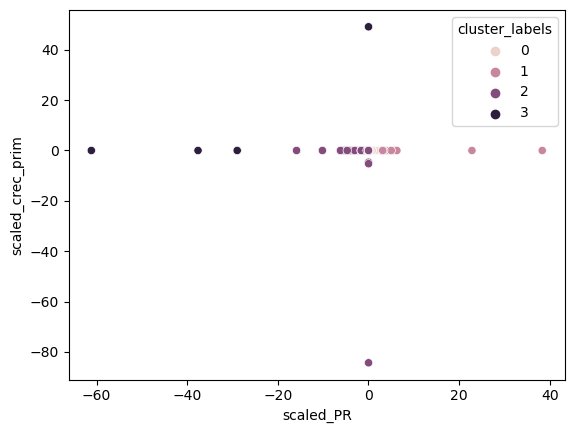

In [43]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_PR','scaled_crec_prim']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_PR','scaled_crec_prim']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='scaled_PR', y='scaled_crec_prim', 
                hue='cluster_labels', data = df_agentes)

In [44]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0     588
1      29
2    8951
3       4
Name: NOMBRE, dtype: int64


In [45]:
print(df_agentes.groupby('cluster_labels')[['scaled_PR','scaled_crec_prim']].mean())

0               scaled_PR  scaled_crec_prim
cluster_labels                             
0                0.680604      2.021168e-15
1                5.867773      3.726069e-15
2               -0.000007     -1.052603e-02
3              -31.922410      1.228360e+01


In [40]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

2 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ALFREDO RAMOS MARTINEZ']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'FELIPE BALLESTEROS MONTIEL'
 'GRUPO CIDAR BUSINESS BROKERS AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'SICUREZZA AGENTE DE SEGUROS Y DE FIANZAS SA DE CV']
0 ['AD SEGUROS, AGENTE DE SEGUROS Y DE FIANZAS, S.A DE C.V.'
 'ADAN PORRAS RANGEL' 'ADAN RAFAEL RAMIREZ CARREÑO'
 'ADRIAN FRANCISCO GOMEZ YANOWISKY' 'ALAN ACOSTA QUINTANILLA']
1 ['ALBERTO RAFAEL AILLAUD MADRIGAL' 'ALEJANDRO JAVIER SOSA GUTIERREZ'
 'ALIANZA TECNOLOGICA AGENTE DE SEGUROS Y DE FIANZAS'
 'ARTURO DANIEL VALLES ORTA'
 'ASESORIA EN PROTECCION AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V']


## Con Prima rentable y puntos prima

In [46]:
df_agentes['PUNTOS PRIMA']=df_agentes['PUNTOS PRIMA'].astype(float)

cluster_centers, distortion = kmeans(df_agentes[['scaled_PR','PUNTOS PRIMA']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_PR','PUNTOS PRIMA']], cluster_centers)

In [47]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0    2713
1    3062
2    3292
3     505
Name: NOMBRE, dtype: int64


In [48]:
print(df_agentes.groupby('cluster_labels')[['scaled_PR','PUNTOS PRIMA']].mean())

#'scaled_vig', este tmb afecta mucho la clusterización

0               scaled_PR  PUNTOS PRIMA
cluster_labels                         
0                0.000792      0.000000
1               -0.043882      1.002613
2                0.056592      2.006379
3                0.769348      2.776238


In [49]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

0 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALFREDO RAMOS MARTINEZ' 'AARON ENRIQUE CARRIZALES LEMUS']
2 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV' 'AARON GARZA RODRIGUEZ'
 'ABEL RAMIREZ MIRANDA' 'ABEL SALGADO MEJIA' 'ABEL TRUJILLO GARCIA']
1 ['AARON ALEJANDRO QUIROZ PARRILLA' 'AARON BARRON VIZUET'
 'ABEL ORNELAS ALCALA' 'ABIGAIL AMADOR CRUZ' 'ABIGAIL PEREZ MIRANDA']
3 ['ABEL BERNAL ORPINEL' 'ABRAHAM FEREZ GONZALEZ'
 'ADAN RAFAEL RAMIREZ CARREÑO'
 'ADELANTE, AGENTE DE SEGUROS Y DE FIANZAS, S.A. DE C.V.'
 'ADID Y ASOCIADOS AGENTE DE SEGUROS, S. A. DE C. V.']


## Lo primero + IC

In [50]:
cluster_centers, distortion = kmeans(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_IC']], 4)
df_agentes['cluster_labels'], distortion_list = vq(df_agentes[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_IC']], cluster_centers)

In [51]:
print(df_agentes.groupby('cluster_labels')['NOMBRE'].count())

cluster_labels
0    3820
1    4078
2    1531
3     143
Name: NOMBRE, dtype: int64


In [52]:
print(df_agentes.groupby('cluster_labels')[['scaled_autos', 'scaled_daños','scaled_crec_pol','scaled_GMM','scaled_vig','scaled_crec_prim','scaled_IC']].mean())

0               scaled_autos  scaled_daños  scaled_crec_pol  scaled_GMM  \
cluster_labels                                                            
0                   0.243747      0.231086         0.085931    0.150596   
1                   0.021529      0.013861        -0.035305    0.038148   
2                   0.043177      0.058739         0.309083    0.108400   
3                   2.864786      3.159591         0.202737    5.844710   

0               scaled_vig  scaled_crec_prim  scaled_IC  
cluster_labels                                           
0                 1.258691     -1.219956e-03   0.037030  
1                 0.112962     -9.597140e-17  -0.000041  
2                 2.785094     -5.849659e-02   0.047208  
3                 1.186240      3.435971e-01   0.025728  


In [53]:
for cluster in df_agentes['cluster_labels'].unique():
    print(cluster, df_agentes[df_agentes['cluster_labels'] == cluster]['NOMBRE'].values[:5])

1 ['123DIGITAL AGENTE DE SEGUROS SAPI DE CV'
 '3QL BROKER AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V'
 'A.F. PENSAR AGENTE DE SEGUROS S.A. DE C.V.'
 'AARON ALFREDO RAMOS MARTINEZ' 'AARON BARRON VIZUET']
3 ['AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV'
 'ADELANTE, AGENTE DE SEGUROS Y DE FIANZAS, S.A. DE C.V.'
 'AFIRMA AGENTE DE SEGUROS SA DE CV' 'ALBERTO RAFAEL AILLAUD MADRIGAL'
 'ALEJANDRO JAVIER SOSA GUTIERREZ']
2 ['AARON ALEJANDRO QUIROZ PARRILLA' 'AARON ENRIQUE CARRIZALES LEMUS'
 'ABEL RAMIREZ MIRANDA' 'ABELARDO RODRIGUEZ SERRALDE'
 'ABIGAIL PEREZ MIRANDA']
0 ['AARON GARZA RODRIGUEZ' 'ABEL BERNAL ORPINEL' 'ABEL ORNELAS ALCALA'
 'ABEL SALGADO MEJIA' 'ABELARDO LOZANO ALCANTAR']


### Para saber que hace la funcion whiten

In [68]:
features  = np.array([[1.9, 2.3, 1.7],
                      [1.5, 2.5, 2.2],
                      [0.8, 0.6, 1.7,]])

In [65]:
std=np.std(features)
print(std)

0.609998988058258


In [62]:
print(features/std)

[[3.11475927 3.77049806 2.78688987]
 [2.45902047 4.09836745 3.60656336]
 [1.31147759 0.98360819 2.78688987]]


In [74]:
print(whiten(features))

[[4.17944278 2.69811351 7.21248917]
 [3.29956009 2.93273208 9.33380951]
 [1.75976538 0.7038557  7.21248917]]


In [70]:
features2  = np.array([1.9, 2.3, 1.7,
                      1.5, 2.5, 2.2,
                      0.8, 0.6, 1.7,])

In [71]:
std=np.std(features2)
print(std)

0.609998988058258


In [72]:
print(features2/std)

[3.11475927 3.77049806 2.78688987 2.45902047 4.09836745 3.60656336
 1.31147759 0.98360819 2.78688987]


In [75]:
print(whiten(features2))

[3.11475927 3.77049806 2.78688987 2.45902047 4.09836745 3.60656336
 1.31147759 0.98360819 2.78688987]
